# Market Memory Analysis using Product Reviews

<b> Background - : </b> Memory effects can appear in activity patterns, such as in earthquakes and weather patterns [1]. The memory coefficient $\mu$ ($-1\leq \mu \leq  1$), which is defined as the the correlation coefficient of all consecutive interevent time
values in the signal over a population. In this project, I will use the memory coefficient to mean the correlation coefficient of all consecutive interevent time values for the review posting activity of a given product. 

<b> Objective of this analysis: </b> By analysing the memory coefficient of the products, we can see if there are trends in the review posting activity that reflect a kind of 'market memory' or memory effect in the consumer behaviour that is reflected in the posting of product reviews on Amazon. It is difficult for me to say what exactly the memory coefficient represents in this senario, but depending on the product, it memory coefficient could reflect the effectiveness of certain marketting campaigns for a given product, or quantify the extent to which there are seasonal variation in the consumer behaviour for a given product. This project will also try to find any relationships between the memory coefficient and other properties of product reviews such as average rating of the product.

<b> Data set: </b> This data set is originally from this website https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews [2]. The product category is amazon's fine foods category. 

Citation
1. K.-I. Goh and A.-L. Barabási 2008 EPL 81 48002 (https://iopscience.iop.org/article/10.1209/0295-5075/81/48002/meta)

2. J. McAuley and J. Leskovec. From amateurs to connoisseurs: modeling the evolution of user expertise through online reviews. WWW, 2013.


### Import  dependencies and connect to MySQL database

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
plt.rcParams.update({'font.size': 14})

#import nltk

In [3]:
import mysql.connector as connection

In [4]:
mydb = connection.connect(host="localhost",database='amazon_reviews_data',user="root", passwd="  ")  #Add password and database name.
#query = "Select * from ;"   #Add data table name.
query = '''SELECT *
           FROM review_info_3
           WHERE ProductId IN (SELECT ProductId 
                               FROM review_info_3 
                               GROUP BY ProductId 
                               HAVING COUNT(ProductId) > 100)'''
df = pd.read_sql(query,mydb)
mydb.close() #close the connection

In [5]:
# Read in data
#df = pd.read_csv('Reviews.csv')
print(df.shape)
#df = df.head(50000)
print(df.shape)

(175625, 10)
(175625, 10)


In [6]:
df.head()

,Id,ProductId,UserId,ProductName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time_record,Summary,Text_record
0,423,B000G6RYNE,A2NO1TXXS9T0EE,BruteNStones,0,0,4,1.335400e+09,Hard,"Great if you are cutting back on fat, they do ..."
1,424,B000G6RYNE,A1IRN1M05TPOVT,"Sharon M. Helfand ""Scrapper""",0,0,5,1.334620e+09,Kettle potato chips: Fully loaded baked potato,I have never met a Kettle brand chip I did not...
2,425,B000G6RYNE,ARONI7W0W677H,Peter N,0,0,5,1.334280e+09,"Fresh, Lightly-Spiced, Crunchy Kettle Chips. G...",After buying bags one at a time (at a hefty ma...
3,426,B000G6RYNE,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1.334020e+09,glad to find them in 1 oz size,"I buy mostly for vending, so the size of the b..."
4,427,B000G6RYNE,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1.334020e+09,"pretty good, could be better",Glad to find these in a one ounce size but the...


#### The number of reviews for the most reviewed porducts

In [7]:
df_t  = df['ProductId'].value_counts()
df_t[:10]

B007JFMH8M    913
B002QWHJOU    632
B0026RQTGE    632
B002QWP89S    632
B002QWP8H0    632
B003B3OOPA    623
B001EO5Q64    567
B0013NUGDE    564
B001RVFEP2    564
B006HYLW32    564
Name: ProductId, dtype: int64

In [8]:
df_t.index[0]

'B007JFMH8M'

In [9]:
print('Total number of products:    ',len(df_t))

Total number of products:     862


In [10]:
df[:40]

,Id,ProductId,UserId,ProductName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time_record,Summary,Text_record
0,423,B000G6RYNE,A2NO1TXXS9T0EE,BruteNStones,0,0,4,1.335400e+09,Hard,"Great if you are cutting back on fat, they do ..."
1,424,B000G6RYNE,A1IRN1M05TPOVT,"Sharon M. Helfand ""Scrapper""",0,0,5,1.334620e+09,Kettle potato chips: Fully loaded baked potato,I have never met a Kettle brand chip I did not...
2,425,B000G6RYNE,ARONI7W0W677H,Peter N,0,0,5,1.334280e+09,"Fresh, Lightly-Spiced, Crunchy Kettle Chips. G...",After buying bags one at a time (at a hefty ma...
3,426,B000G6RYNE,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1.334020e+09,glad to find them in 1 oz size,"I buy mostly for vending, so the size of the b..."
4,427,B000G6RYNE,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1.334020e+09,"pretty good, could be better",Glad to find these in a one ounce size but the...
5,428,B000G6RYNE,A1ELZC3WXWILX2,B. Carter,0,0,5,1.333670e+09,a slight taste of jalapeno,one of the best chips that you can buy...and i...
6,429,B000G6RYNE,A1X5RAIMX4ZSLJ,BadPotato,0,0,5,1.331860e+09,Best chips ever,"The title says it all. Great flavor, hint of s..."
7,430,B000G6RYNE,A1IRN1M05TPOVT,"Sharon M. Helfand ""Scrapper""",0,0,5,1.331080e+09,Kettle potato chips: Sweet onion,WOW! I have eaten quite a few potato chips in...
8,431,B000G6RYNE,A1S8ELUE383P8E,"John F. Peters ""John Peters""",0,0,5,1.330910e+09,Ridiculously Good,I cannot say how much I love Kettle brand pota...
9,432,B000G6RYNE,A2OEUROGZDTXUJ,J. Graves,0,0,5,1.327880e+09,Delicious!,"Now, I haven't done a side-by-side comparison,..."


## Sample of memory coefficients

In [76]:
for k in [10]:
    productid = df_t.index[k]    #This is the ProductId.
    single_product_data = df.loc[df["ProductId"] == productid]
    time_rec = sorted(single_product_data['Time_record'].to_list())
    interevent_times = [time_rec[j + 1] - time_rec[j] for j in range(len(time_rec) - 1)]
    m_1 = np.average(interevent_times[:-1])   #Get the average interevent values (first section).
    m_2 = np.average(interevent_times[1:])
    sig_1 = np.std(interevent_times[:-1], ddof = 1)     #Get the standard deviation of the interevent values.
    sig_2 = np.std(interevent_times[1:], ddof = 1)
    memory = 0
    for i in range(len(interevent_times) - 1):
        memory += (1/(len(interevent_times) - 1))*((interevent_times[i] - m_1)*(interevent_times[i + 1] - m_2))/(sig_1*sig_2)

In [78]:
print('The memory coefficient for this product is: ',memory)

The memory coefficient for this product is:  0.3081487735103599


(array([  1.,   2.,   3.,   0.,   9.,   7.,   2.,  13.,   9.,  16.,  22.,
         11.,  23.,  20.,  11.,  22.,  41.,  27.,  16.,  38.,  20.,  12.,
         22.,  17.,  15., 110.,  19.,  22.,   8.,  26.]),
 array([1.20252000e+09, 1.20747067e+09, 1.21242133e+09, 1.21737200e+09,
        1.22232267e+09, 1.22727333e+09, 1.23222400e+09, 1.23717467e+09,
        1.24212533e+09, 1.24707600e+09, 1.25202667e+09, 1.25697733e+09,
        1.26192800e+09, 1.26687867e+09, 1.27182933e+09, 1.27678000e+09,
        1.28173067e+09, 1.28668133e+09, 1.29163200e+09, 1.29658267e+09,
        1.30153333e+09, 1.30648400e+09, 1.31143467e+09, 1.31638533e+09,
        1.32133600e+09, 1.32628667e+09, 1.33123733e+09, 1.33618800e+09,
        1.34113867e+09, 1.34608933e+09, 1.35104000e+09]),
 <BarContainer object of 30 artists>)

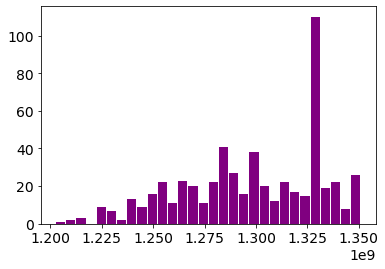

In [79]:
#The review posting pattern for this product over time.
plt.hist(time_rec, 30, color='purple', rwidth = 0.9)

## What is the time interval?

In [19]:


for k in [10]:
    productid = df_t.index[k]    #This is the ProductId.
    single_product_data = df.loc[df["ProductId"] == productid]
    time_rec = sorted(single_product_data['Time_record'].to_list())
    
    print('The number of unique review post times: ', len(np.unique(time_rec)))
    print('The total number of review post times', len(time_rec))
    interevent_times = [time_rec[j + 1] - time_rec[j] for j in range(len(time_rec) - 1)]
    different_time_bin = [interval for interval in interevent_times if interval != 0]
    print('The minimum review post time interval is: ', min(different_time_bin))

The number of unique review post times:  395
The total number of review post times 564
The minimum review post time interval is:  80000.0


The above shows that the time intervals for when the reviews are posted are aggregates; The time step of the data is on a daily to maybe a monthly basis (I have not yet found where the time frame for the smallest time step of the data is given yet since it is not clearly noted in the dataset information, but for the purpose of the analysis, it is not so important as I explain below. The entire data spans a period of over 10 years). We'll assume that the time step per bin is fine enough that the data within each time-bin can be treated approximately randomly. The function randomly_distributed() that I define below will 'strech' the time scale and randomly distibute the review post times within each time bin. The reason that I'm spreading it is because the memory coefficient is defined in such a way that two consecutive review posting times should be non-equal. When more than one review is binned in the same time step, the two consecutive posting times are equal, and this might effect how well the memory coefficient captures any memory effect. So my assumption that the posting time within a given time-bin is negligible is important in justifying this part. 

In [75]:
#Estimating the length of a single time step that the reviews are binned in.
num_products = len(df_t)
list_of_num_of_unique_times = []

for k in range(num_products):
    productid = df_t.index[k]    #This is the ProductId.
    single_product_data = df.loc[df["ProductId"] == productid]
    time_rec = sorted(single_product_data['Time_record'].to_list())
    list_of_num_of_unique_times.append(len(np.unique(time_rec)))
    
print('The max number of unique review post times: ', max(list_of_num_of_unique_times))
print('The average number of unique review post times: ', np.average(list_of_num_of_unique_times))
print('The standard deviation', np.std(list_of_num_of_unique_times))


The max number of unique review post times:  472
The average number of unique review post times:  154.1647331786543
The standard deviation 79.04134581280005


According to the dataset information page, the reviews were collected between Oct 1999 - Oct 2012. So over 14 years, the product with the most review has 472 unique times when reviews were posted for it. So 472/14 ~ 33.7. So this means reviews are probably binned on a roughly weekly to bi-weekly basis.

In [20]:
#First make sure all products have the same minimum review post time step.
num_products = len(df_t)
list_of_min_time_steps = []

for k in range(num_products):
    productid = df_t.index[k]    #This is the ProductId.
    single_product_data = df.loc[df["ProductId"] == productid]
    time_rec = sorted(single_product_data['Time_record'].to_list())
    

    interevent_times = [time_rec[j + 1] - time_rec[j] for j in range(len(time_rec) - 1)]
    different_time_bin = [interval for interval in interevent_times if interval != 0]
    list_of_min_time_steps.append(min(different_time_bin))

In [22]:
np.unique(list_of_min_time_steps)

array([80000., 90000.])

There seems to be 2 minimum time steps depending on the product. Depending on the minimum time step of the product, the reviews that were posted during a single time step (meaning they are posted at the same 'time' as given in the data) will be randomly distibuted within a range of the minimum time step.

In [63]:
def randomly_distribute(time_list, interevent_times):
    '''The time_list must already be a sorted time_list. Calculates the minimum time step, and if there are any time steps that have more than 1 review, the reviews will 
    randomly distibuted within that single time step. The function returns a time series list where the overlapping times have 
    been randomly distributed within the minimum time step. For example, if the minimum time step is 80000, and there are four posts on that
    day, then the first one might keep the time as 80000, the second one might be assigned the value 91800, the third one 
    124000, and so one. The assigned value has to be within the minimum time step so the maximum that can be assigned in 
    this example must be less than 2x80000 = 160000. '''
    different_time_bin = [interval for interval in interevent_times if interval != 0]
    min_time_step = min(different_time_bin)  #Either 80000 or 90000
    accumulate = []
    unique_times_info = np.unique(time_list, return_counts = True) 
    unique_times = unique_times_info[0]
    unique_time_counts = unique_times_info[1]   #The number of times each unique value occurs.
    new_time_rec = []
    
    for i in range(len(unique_times)):
        lower_bound = unique_times[i]
        upper_bound = unique_times[i] + min_time_step - 1   #The -1 is so it doesn't overlap with the next time interval.
        randomly_dist_times = np.random.randint(lower_bound, upper_bound, unique_time_counts[i]) 
        randomly_dist_times = sorted(randomly_dist_times)
        #The times in randomly_dist_times may potentially not be unique. But since the range that the times
        #are picked from are 80000, and since the maximum number of reviews for a product is under 1000, we
        #can be pretty confident that randomly_dist_times will rarely have non-unique values that overlap.
        for new_time in randomly_dist_times:
            new_time_rec.append(new_time)
            
    return new_time_rec

In [66]:
#test
print(time_rec[:10])
print(randomly_distribute(time_rec[:10], interevent_times[:10]))

[1.27708e+09 1.27708e+09 1.27716e+09 1.27716e+09 1.27716e+09 1.27725e+09
 1.27725e+09 1.27725e+09 1.27725e+09 1.27725e+09]
[1277080152, 1277136314, 1277194380, 1277206639, 1277226586, 1277262522, 1277285000, 1277300748, 1277303827, 1277311859]


# Memory Coefficient across all Products

In [67]:
num_products = len(df_t)
memory_list = []

for k in range(num_products):
    productid = df_t.index[k]    #This is the ProductId.
    single_product_data = df.loc[df["ProductId"] == productid]
    pre_time_rec = sorted(single_product_data['Time_record'].to_list())
    pre_interevent_times = [pre_time_rec[j + 1] - pre_time_rec[j] for j in range(len(pre_time_rec) - 1)]
    
    time_rec = randomly_distribute(pre_time_rec, pre_interevent_times)
    interevent_times = [time_rec[j + 1] - time_rec[j] for j in range(len(time_rec) - 1)]
    m_1 = np.average(interevent_times[:-1])   #Get the average interevent values (first section).
    m_2 = np.average(interevent_times[1:])
    sig_1 = np.std(interevent_times[:-1], ddof = 1)     #Get the standard deviation of the interevent values.
    sig_2 = np.std(interevent_times[1:], ddof = 1)
    memory = 0
    for i in range(len(interevent_times) - 1):
        memory += (1/(len(interevent_times) - 1))*((interevent_times[i] - m_1)*(interevent_times[i + 1] - m_2))/(sig_1*sig_2)
    memory_list.append(memory)

(array([ 2.,  2., 13., 19., 47., 60., 63., 86., 31., 79., 39., 54., 47.,
        37., 29., 36., 24., 17., 28., 19., 13., 27., 28.,  5., 14., 23.,
        16.,  2.,  0.,  2.]),
 array([-0.13299377, -0.09840218, -0.06381059, -0.029219  ,  0.0053726 ,
         0.03996419,  0.07455578,  0.10914737,  0.14373897,  0.17833056,
         0.21292215,  0.24751374,  0.28210534,  0.31669693,  0.35128852,
         0.38588011,  0.42047171,  0.4550633 ,  0.48965489,  0.52424648,
         0.55883808,  0.59342967,  0.62802126,  0.66261285,  0.69720445,
         0.73179604,  0.76638763,  0.80097922,  0.83557082,  0.87016241,
         0.904754  ]),
 <BarContainer object of 30 artists>)

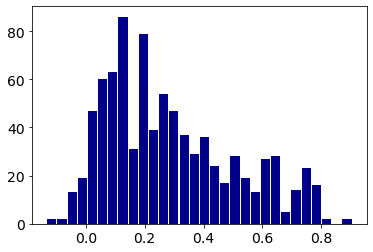

In [68]:
plt.hist(memory_list, 30, color='darkblue', rwidth = 0.9)

At this point, it is interesting to note that typically human activity patterns are found to not display a high memory coefficient as discussed in the paper by  K.-I. Goh and A.-L. Barabási (2008). We see similar result here where most of the memory coefficient values are between 0 - 0.4. However, there are also many products that have a high memory coefficient, showing that there is a memory effect for certain products. 

### Is there a relationship between the average rating of a product and its memory coefficient?

In [69]:
num_products = len(df_t)
avg_rating_list = []
is_nan_check = 0

for k in range(num_products):
    productid = df_t.index[k]    #This is the ProductId.
    single_product_data = df.loc[df["ProductId"] == productid]
    ratings = single_product_data['Score'].to_list()
    is_nan_check += sum(np.isnan(ratings))
    #ratings = ratings[~np.isnan(ratings)]
    avg_rating = np.average(ratings)
    std_of_rating = np.std(ratings)
    avg_rating_list.append(avg_rating)

In [164]:
is_nan_check  #No Score values are nan!

0

slope =  -0.145


Text(0.5, 0, 'Memory Coefficient')

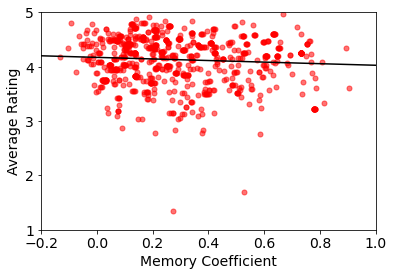

In [70]:
plt.scatter(memory_list,avg_rating_list, color='red', s =25, alpha = 0.55)
poly_coeffs = np.polyfit(memory_list,avg_rating_list, deg = 1)
print('slope = ', np.round(poly_coeffs[0],3))
plt.plot(np.linspace(-0.2,1,num=20),poly_coeffs[0]*np.linspace(-0.2,1,num=20) + poly_coeffs[1], color='black')
plt.ylim(1,5)
plt.xlim(-0.2,1)
plt.ylabel('Average Rating')
plt.xlabel('Memory Coefficient')

There appears to be no significant variation in the relationship between the rating of a product and it memory coefficient.

### Do products with a higher memory coefficient have more reviews, and therefore more publicity?

In [71]:
num_products = len(df_t)
count_list = []


for k in range(num_products):
    productid = df_t.index[k]    #This is the ProductId.
    single_product_data = df.loc[df["ProductId"] == productid]
    ratings = single_product_data['Score'].to_list()
    ratings_num = len(ratings)
    count_list.append(ratings_num)

slope =  54.461


Text(0, 0.5, 'Number of Reviews')

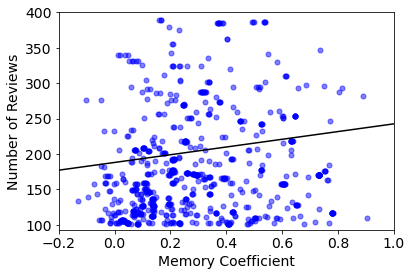

In [72]:
plt.scatter(memory_list,count_list, color='blue', s =25, alpha = 0.5)
count_poly_coeffs = np.polyfit(memory_list,count_list, deg = 1)
print('slope = ', np.round(count_poly_coeffs[0],3))
plt.plot(np.linspace(-0.2,1,num=20),count_poly_coeffs[0]*np.linspace(-0.2,1,num=20) + count_poly_coeffs[1], color='black')
plt.ylim(93,400)
plt.xlim(-0.2,1)
plt.xlabel('Memory Coefficient')
plt.ylabel('Number of Reviews')

In [73]:
count_poly_coeffs[0], np.average(count_list), str(np.round(count_poly_coeffs[0] /count_poly_coeffs[1]*100 )) + '% increase in number of reviews when going from a memory coefficient of 0 to 1.'

(54.46147148584617,
 203.74129930394432,
 '29.0% increase in number of reviews when going from a memory coefficient of 0 to 1.')

Products with a higher memory coefficient generally have a larger number of reviews, showing that the products with a larger number of reviews have a higher chance of exhibiting a memory effect in its review posting patterns. There are a couple of reason behind why a product may have a high memory coefficient. For example, it could be displaying the effectiveness of marketing campaigns to generate interest in the product. Or it could also mean that there are seasonal changes in the consumer behaviour for that product. A small memory coefficient could mean that the purchasing of the product occurs rather randomly and that there are no memory effects in the customer base for that product. It is important to note that this does not rule out the possibility of a bursty review activity, which the memory coefficient may not be able to capture in its value.

## Conclusion

This project found that product reviews on Amazon can display a wide range of memory coefficients. Typically products with a higher number of reviews appears to have a higher memory effect, displaying that the memory coefficient reflects higher customer engagement with the product. I personally found it interesting that there was almost no relationsip between the memory coefficient and average rating for a product. 

<b>  Next Steps </b>  
1. Analysing the data further may reveal more interesting relationships between the memory coefficient and elements of the product reviews (e.g. number of really low product ratings).

2. The burstiness of the product review posting pattern is not typically captured in the memory coefficient according to  K.-I. Goh and A.-L. Barabási (2008). Studying the burstiness can be an interesting analysis to do.

3. Can the memory coefficient be useful for predicting anything about the quality of the reviews or about how well the given product will perform over the long term? 

### Appendix 1.a: Plot Score versus Time

This section was used to explore how the 'Score' values were distriuted over 'Time'. 

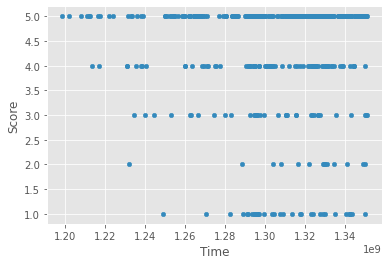

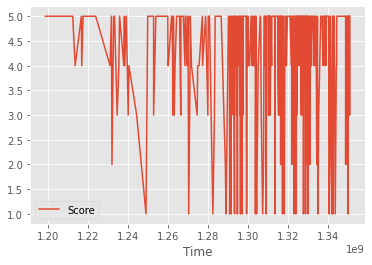

In [10]:
most_reviewed = df[df['ProductId'] == 'B000PDY3P0']
ax = most_reviewed.plot.scatter('Time', 'Score')
most_reviewed_time = most_reviewed.sort_values('Time')
ax = most_reviewed_time.plot('Time', 'Score')

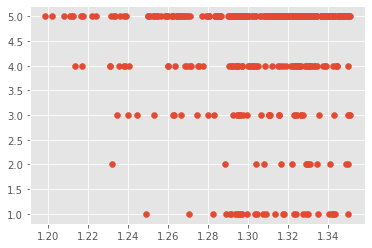

In [11]:

x = most_reviewed_time['Time']/1000000000
y = most_reviewed_time['Score']
plt.scatter(x,y)
plt.xlim()
plt.show()

#### Appendix 1.b Find average time before the next review

In [12]:
#Total Time
time_list = most_reviewed_time['Time'].reset_index(drop = True)
time_list.iloc[-1]
total_time = time_list.iloc[-1] - time_list[0]
print(time_list)
time_diff = time_list.diff()[2:]  #Get the difference between each row and it's previous row time value. Exclude the first row (NaN)
#Take from the second row since the first entry appears to be like an outsider since it was the first review
time_mean = time_diff.mean()

0      1198886400
1      1202256000
2      1208390400
3      1211155200
4      1212019200
          ...    
482    1350432000
483    1350691200
484    1350777600
485    1350950400
486    1351036800
Name: Time, Length: 487, dtype: int64


In [148]:
print('Average "time" before next review:  ',time_mean/total_time)   #~0.0012, (or 0.0015 if including the first entry) 
                              #so if the total time is 1 year, then approximately 3 reviews per day on average.


Average "time" before next review:   0.0012874433384737606
